In [1]:
def objective_function(x):
    x1,x2 = x
    return 0.5*(x1 ** 2+x2 ** 2) - 0.5*x1*x2

## 2. Objective function

First, we will examine the objective function used in this exercise. To facilitate visualization, we will use an objective function that takes two input variables and produces one output. The symbol $f$ introduced below will represent the objective function from now on.

<br/>

$$ f(\mathbf{x}) = f(x_1, x_2) = \frac{1}{2} (x_1^2 + x_2^2) - \frac{1}{2} x_1x_2 $$

<br/>

### 2.1. Visualization of objection function $f$

**LEFT**: 3D Surface plot  
The figure represents the given objective function in a 3D space using Matplotlib. From the figure, we can observe that the given objective function is a convex function and has a global minimum at (0, 0).

<br>

**RIGHT**: 2D Contour plot  
The figure below represents the given objective function in a 2D space using Matplotlib, with contours indicating the height. The red 'x' marks the initial point $\mathbf{x}_0$​ where the optimization begins.

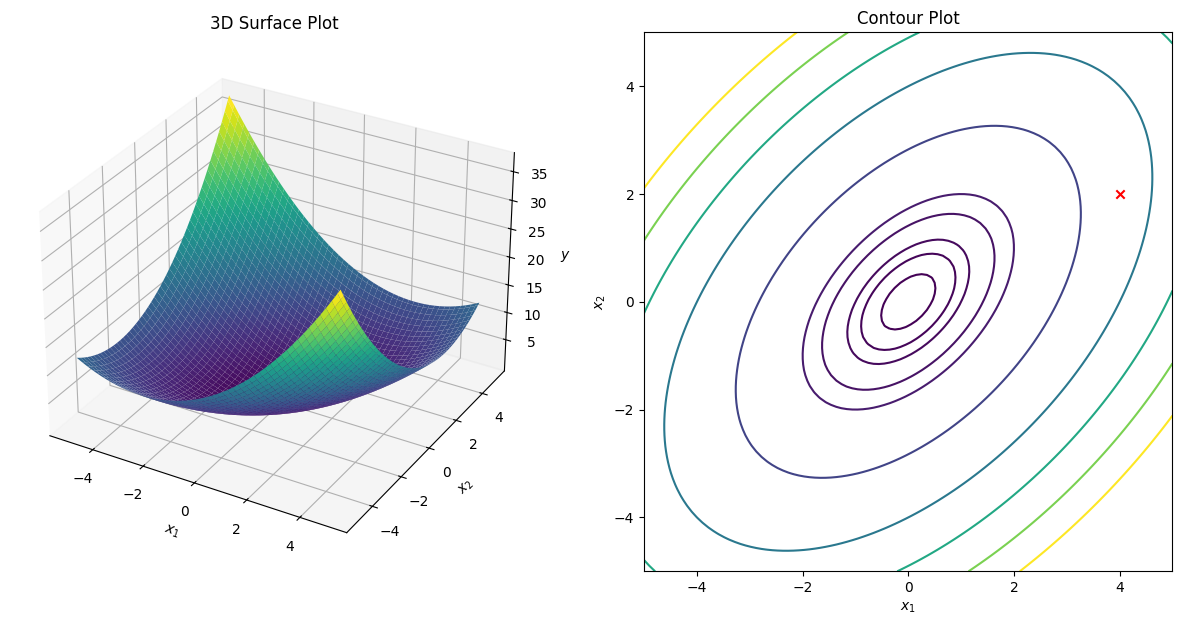

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100) #100개의 x1, x2 데이터

# Generate all possible combinations of (x1, x2)
x1, x2 = np.meshgrid(x1, x2) # 100*100 경우의 수가 있다.
y = objective_function((x1, x2))

# Create Figure and 3D axes
fig = plt.figure(figsize=(15, 7))

# Add 3D projection to the first subplot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(x1, x2, y, cmap='viridis', edgecolor='none')

# Set labels and title
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$y$')
ax1.set_title('3D Surface Plot')

ax2 = fig.add_subplot(122)
ax2.contour(x1, x2, y, levels =[0,0.1,0.3,0.5,1,1.5,4,8,12,16,20]) # Specify contour levels manually 안으로 갈 수록 조밀하게 이용.
ax2.scatter(4, 2, marker='x', color='red') # Mark the starting point of optimization
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title('Contour Plot')

plt.show()


### 3.1. Gradient descent

In machine learning, the most commonly used gradient descent method optimizes a given objective function by utilizing its first derivative or gradient. For a univariate objective function (Equation 1), the derivative is used, while for a multivariate function (Equation 2), the gradient is employed.


- $\eta$ : learning rate (=step size)

<br/>

$$ x_{t+1} := x_t - \eta \cdot f'(x_t) \tag{1}$$

$$ \mathbf{x}_{t+1} := \mathbf{x}_t - \eta \cdot \nabla f( \mathbf{x}_t ) \tag{2} $$

<br/>

$$\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \qquad \nabla f = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \end{bmatrix} $$


In [4]:
#@title visualizaiton code

import numpy as np
import matplotlib.pyplot as plt

# helper function to annotate a single point
def annotate_pt(ax, text, xy, xytext, color):
    ax.plot(xy[0], xy[1], marker='P', markersize=5, c=color)
    ax.annotate(text, xy=xy, xytext=xytext, arrowprops=dict(arrowstyle='-',
                                                             color=color,
                                                             connectionstyle='arc3'))

# plot the function
def function_plot(ax, x1, x2, f_val):
    f_plot = ax.contour(
        x1,
        x2,
        f_val,
        vmin=min(f_val.flatten()),
        vmax=max(f_val.flatten()),
        levels =[0,0.1,0.3,0.5,1,1.5,4,8,12,16,20],
        linewidths = 1.5,
        nchunk = 10)

    ax.set_title('Convergence 2D')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    # Show the optimal point
    annotate_pt(ax, 'global minimum',(0,0), (-6,-6),'red')


def visualize_learning(obj_func, x_history, y_history, extra_param=[], scale=10):
    x1 = np.linspace(-scale, scale, 50)
    x2 = np.linspace(-scale, scale, 50)
    x1, x2 = np.meshgrid(x1, x2)
    y = obj_func((x1, x2))

    fig = plt.figure(figsize=(15, 7))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    vis_3d(ax1, x1, x2, y, x_history, y_history)
    vis_2d(ax2, x1, x2, y, x_history)


def vis_2d(ax, x1, x2, y, x_history):
    function_plot(ax, x1, x2, y)

    # plot the history
    ax.plot(x_history[:, 0], x_history[:, 1], marker='o', c='springgreen', markeredgecolor='k', markeredgewidth=0.5)
    annotate_pt(ax, 'minimum found', (x_history[-1, 0], x_history[-1, 1]), (-1, 6), 'green')



def vis_3d(ax, x1, x2, y, x_history, y_history):
    surf = ax.plot_surface(x1, x2, y, cmap='viridis', edgecolor='none', alpha=0.3)
    ax.plot(x_history[:, 0], x_history[:, 1], y_history, marker='x', color='r', markersize=7, linewidth=2, label='Optimization Path')
    ax.set_title('Convergence 3D')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')


Let's define a function that calculates the gradient of the previously defined objective function. For simplicity, we can use the `jax.grad` function to automatically compute the gradient of a given function.

<br/>

$$f(x_1, x_2) = \frac{1}{2} (x_1^2 + x_2^2) - \frac{1}{2} x_1x_2 $$

<br/>

$$ \nabla f(x_1, x_2) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \end{bmatrix} = \begin{bmatrix} x_1 - \frac{1}{2}x_2 \\ x_2 - \frac{1}{2} x_1 \end{bmatrix} $$

In [5]:
import numpy as np
from typing import Callable, Tuple
from numpy.typing import NDArray

# Implementation of Gradient Descent
def gradient_descent(
        max_iterations: int,
        threshold: float,                   # Convergence threshold
        initial_x: NDArray,
        objective_function: Callable,       # Objective function
        gradient_function: Callable,        # Gradient of the objective function
        learning_rate: float=0.05,
        momentum: float=0.9
    ) -> Tuple[list, list]:

    # Initialize gradient descent settings
    x           = initial_x
    x_history   = [x]
    f_history   = [objective_function(x)]
    delta_x     = np.zeros(x.shape)         # for momentum
    iteration   = 0
    diff        = 1e10

    # Gradient descent step
    while iteration < max_iterations and diff > threshold:
        # Option1: Naïve gradient descent
        x = x - learning_rate * gradient_function(x)

        # Option2: Gradient descent with momentum
        # delta_x = -learning_rate * gradient_function(x)
        # x = x + delta_x

        # Store the history of x and f
        x_history.append(x.copy())
        f_history.append(objective_function(x))

        # Update iteration number and diff between successive values of objective_function
        iteration   += 1
        diff        = np.abs(f_history[-1] - f_history[-2])

    return x_history, f_history


In [6]:
# objective function의 gradient를 계산해주는 함수
def gradient_objective_function(x):
    x1, x2 = x
    return np.array([x1 - 0.5 * x2, x2 - 0.5 * x1])


# 사실 gradient_objective_function은 라이브러리를 통해 간단하게 구할 수 있기도 합니다.
#from jax import grad
#grad_func_using_jax = grad(objective_function)

#### 3.1.2. Visualization of gradient descent

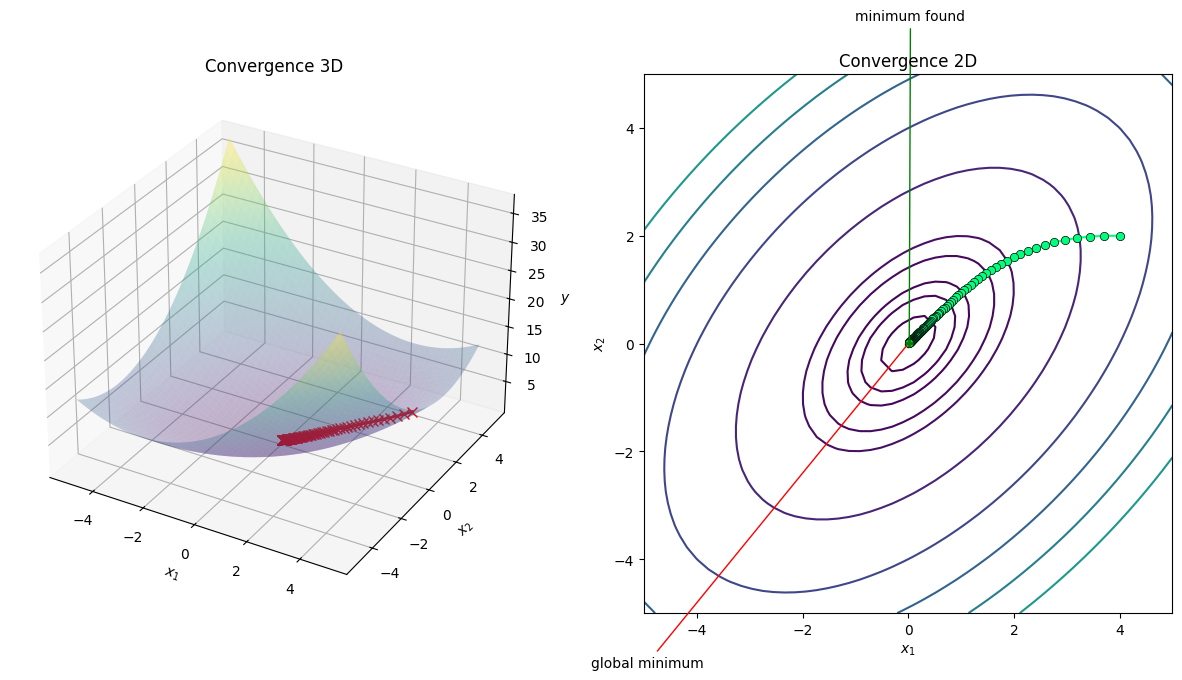

In [10]:
# initial point
starting_point = np.array([4, 2])

# optimize
w_history, f_history = gradient_descent(
    max_iterations = 100,
    threshold = 1e-5,
    initial_x = starting_point,
    objective_function = objective_function,
    gradient_function = gradient_objective_function,
    learning_rate = 1e-1,
    momentum = 0.8
)

# visualize
w_history = np.array(w_history)
f_history = np.array(f_history)
visualize_learning(objective_function, w_history, f_history, scale=5)

Newton_method로 Objective function함수를 수렴시킨다

In [11]:
def newtons_method(
        max_iterations: int,
        initial_x: NDArray,
        objective_function: Callable,
        gradient_function: Callable,
        hessian_function: Callable,
        grad_threshold: float=1e-30
    ) -> Tuple[list, list]:

    # set numerical stability parameter / regularization parameter
    epsilon = 1e-7

    # run the newtons method loop
    x_history = [initial_x]
    y_history = [objective_function(initial_x)]

    x = initial_x.copy() #x와 연관성이 없는 copy를 이용.
    for k in range(max_iterations):
        # evaluate the gradient and hessian
        grad_eval = gradient_function(x)
        hess_eval = hessian_function(x)

        if np.linalg.norm(grad_eval) <= grad_threshold: #내가 정해둔 값보다 grad_eval이 작다면 global minimum에 도착을 한 것이다.
            break

        # reshape hessian to square matrix for numpy linalg functionality
        np.reshape(hess_eval, newshape=(int((np.size(hess_eval) ** 0.5)),
                                        int((np.size(hess_eval) ** 0.5))))

        # solve second order system for weight update
        H = hess_eval + epsilon * np.eye(x.size)
        g = grad_eval
        dx = np.linalg.solve(H, -g)
        x = x + dx
        # x = np.linalg.solve(H, H @ x - g)

        # store the history of x and f
        x_history.append(x)
        y_history.append(objective_function(x))

    return x_history, y_history

In [12]:
def hessian_objective_function(x):
    # x1, x2 = x
    return np.array([[1, -0.5], [-0.5, 1]])


#from jax import hessian
#hessian_func_using_jax = hessian(objective_function)

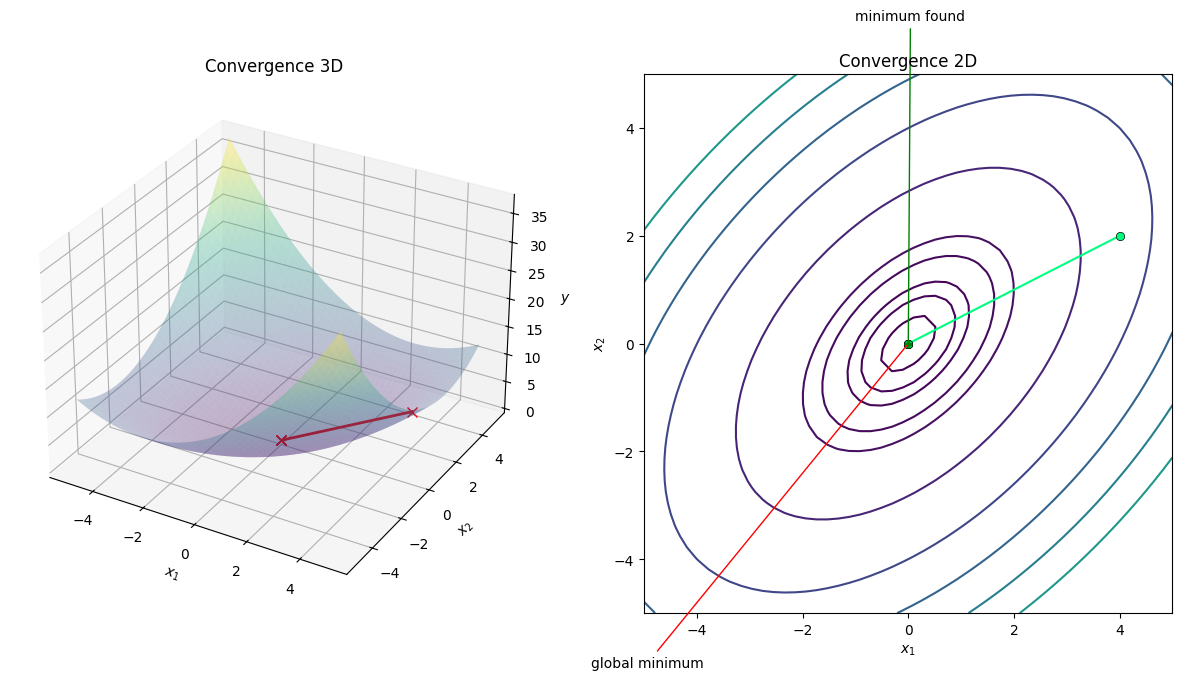

In [13]:
# 초기 지점 설정 (4, 2)
starting_point = np.array([4, 2])

# 경사하강법 진행
w_history, f_history = newtons_method(
    max_iterations = 100,
    initial_x = starting_point,
    objective_function = objective_function,
    gradient_function = gradient_objective_function,
    hessian_function = hessian_objective_function
)

# 파라미터 이동경로 시각화
w_history = np.array(w_history)
f_history = np.array(f_history)
visualize_learning(objective_function, w_history, f_history, scale=5)

In [14]:
from scipy.optimize.linesearch import line_search_armijo

def bfgs(
        max_iterations: int,
        initial_x: NDArray,
        objective_function: Callable,
        gradient_function: Callable,
        gradient_threshold: float = 1e-30
    ) -> Tuple[list, list]:

    # Initialize variables
    x           = np.copy(initial_x)
    x_history   = [x.copy()]
    y_history   = [objective_function(x)]
    B           = np.eye(x.shape[0])  # approximation of Hessian
    gradient    = gradient_function(x)
    previous_f  = None

    # Start the BFGS optimization loop
    for _ in range(max_iterations):
        # Determine the search dx
        direction = np.linalg.solve(B, -gradient)

        alpha, _, old_f = line_search_armijo(objective_function, x, direction, gradient, previous_f)
        if alpha is None:
            alpha = 1.0

        # Update the variables
        dx = alpha * direction
        x = x + dx

        # Update the gradient
        previous_grad = gradient
        gradient = gradient_function(x)

        # Store the history of x and function values
        x_history.append(x.copy())
        y_history.append(objective_function(x))

        # Check for convergence
        if np.linalg.norm(gradient) <= gradient_threshold:
            break

        # Update the approximation of the Hessian matrix
        if previous_grad is not None:
            dg = gradient - previous_grad
            Bdx = B.dot(dx)
            B = B + np.outer(dg, dg) / (dg @ dx) - np.outer(Bdx, Bdx) / (dx.T @ Bdx)

    return x_history, y_history

C:\Users\ksmin\AppData\Local\Temp\ipykernel_25388\64909247.py:1: DeprecationWarning: `scipy.optimize.linesearch.line_search_armijo` is deprecated along with the `scipy.optimize.linesearch` namespace. `scipy.optimize.linesearch.line_search_armijo` will be removed in SciPy 1.14.0, and the `scipy.optimize.linesearch` namespace will be removed in SciPy 2.0.0.
  from scipy.optimize.linesearch import line_search_armijo


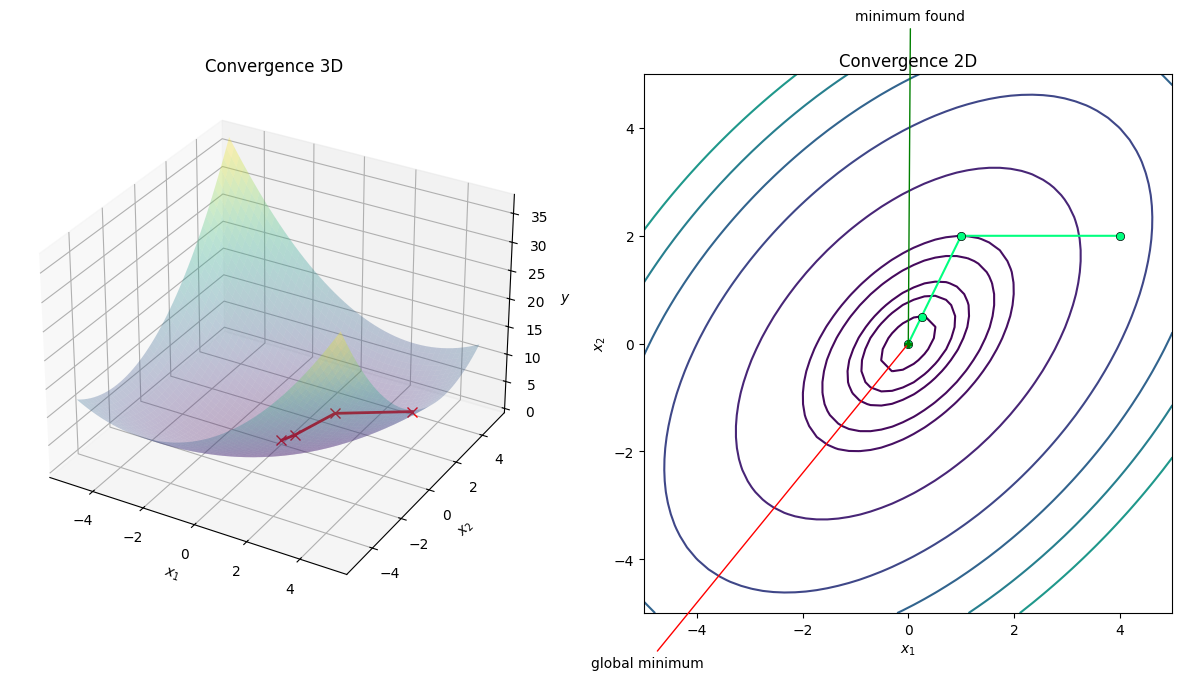

In [15]:
# initial point
starting_point = np.array([4, 2])

# optimize
w_history, f_history = bfgs(
    max_iterations = 100,
    initial_x = starting_point,
    objective_function = objective_function,
    gradient_function = gradient_objective_function
)

# visualize
w_history = np.array(w_history)
f_history = np.array(f_history)
visualize_learning(objective_function, w_history, f_history, scale=5)